In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
from loguru import logger

In [3]:
import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')


import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

%load_ext autoreload
%autoreload 1
%aimport sctk

In [4]:
sc.set_figure_params(figsize=(3, 3))

In [5]:
import os

os.chdir('/home/mowp/workspace/single_cell_analysis')

In [6]:
adata = sctk.sample_data.s4d8_clustered()

In [7]:
adata

AnnData object with n_obs × n_vars = 9370 × 31208
    obs: 'site', 'donor', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'DF_score', 'batch', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant'
    layers: 'scran_normalization'

In [8]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  # Note: DMXL2 should be negative
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  # Note HBM and GYPA are negative markers
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker
}

In [9]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [10]:
adata.layers["counts"] = adata.X
adata.X = adata.layers["scran_normalization"]

adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [11]:
adata

AnnData object with n_obs × n_vars = 9370 × 31208
    obs: 'site', 'donor', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'DF_score', 'batch', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant', 'highly_variable'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'scran_normalization', 'counts'
    obsp: 'distances', 'connectivities'

In [12]:
adata_leiden = adata.copy()

In [13]:
resolutions = [0.5, 1, 1.5, 2]
for res in resolutions:
    sc.tl.leiden(adata_leiden, resolution=res, key_added=f"leiden_{res}")

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


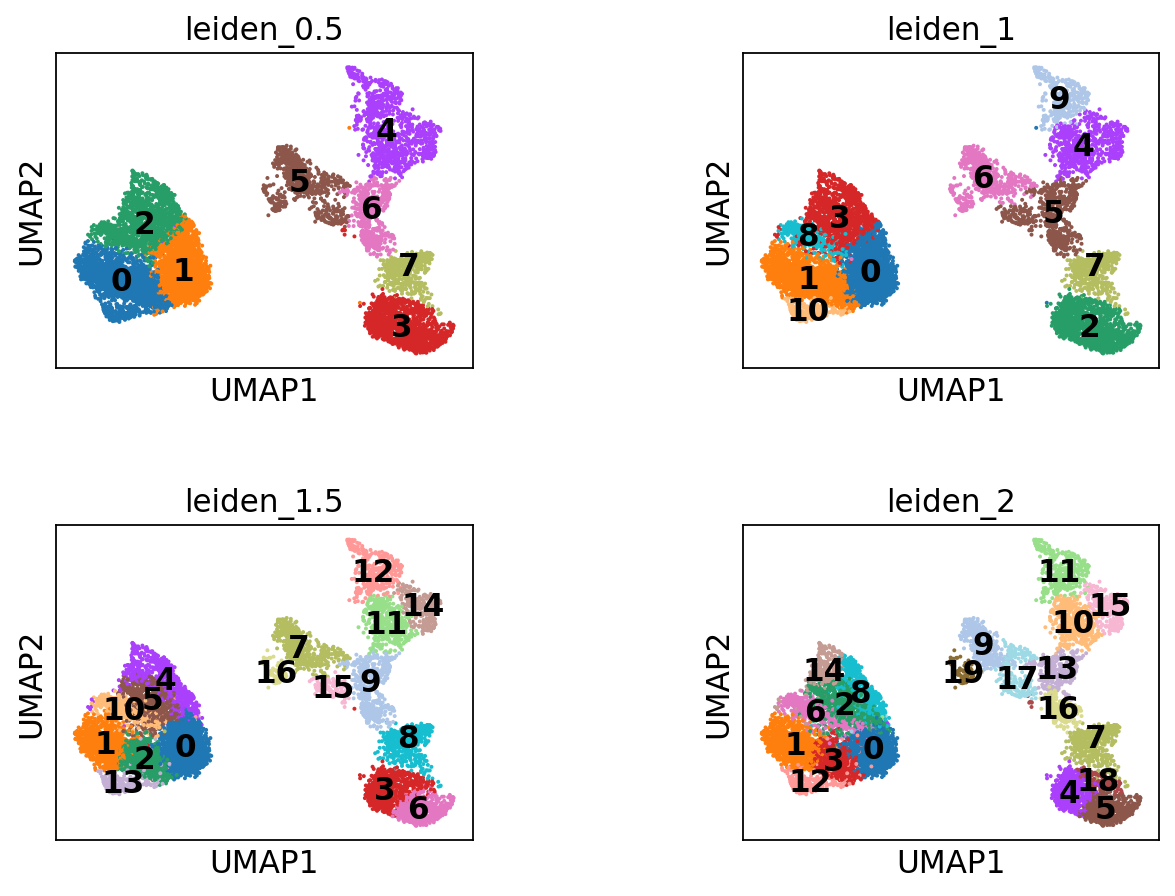

In [14]:
sc.pl.umap(
    adata_leiden, 
    color=['leiden_0.5', 'leiden_1', 'leiden_1.5', 'leiden_2'], 
    ncols=2, wspace=0.5, hspace=0.5,
    legend_loc="on data"
    )

## From markeres to cluster annotation

In [15]:
#  We’ll limit ourselves to B/plasma cell subtypes for this example. 

B_plasma_cts = [
    "Naive CD20+ B",
    "B1 B",
    "Transitional B",
    "Plasma cells",
    "Plasmablast",
]

In [ ]:
for ct in B_plasma_cts:
    logger.info(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
        sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
        frameon=False,
        cmap="Reds",  # or choose another color map e.g. from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    )
    print("\n\n\n")  # print white space for legibility

In [17]:
B_plasma_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes.items()
    if ct in B_plasma_cts
}

In [18]:
B_plasma_markers

{'Naive CD20+ B': ['MS4A1', 'IL4R', 'IGHD', 'FCRL1', 'IGHM'],
 'B1 B': ['MS4A1',
  'SSPN',
  'ITGB1',
  'EPHA4',
  'COL4A4',
  'PRDM1',
  'IRF4',
  'CD38',
  'XBP1',
  'PAX5',
  'BCL11A',
  'BLK',
  'IGHD',
  'IGHM',
  'ZNF215'],
 'Transitional B': ['MME', 'CD38', 'CD24', 'ACSM3', 'MSI2'],
 'Plasma cells': ['MZB1', 'HSP90B1', 'FNDC3B', 'PRDM1', 'IGKC', 'JCHAIN'],
 'Plasmablast': ['XBP1', 'PRDM1', 'PAX5']}

In [ ]:
sc.pl.dotplot(
    adata_leiden,
    groupby="leiden_1",
    var_names=B_plasma_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


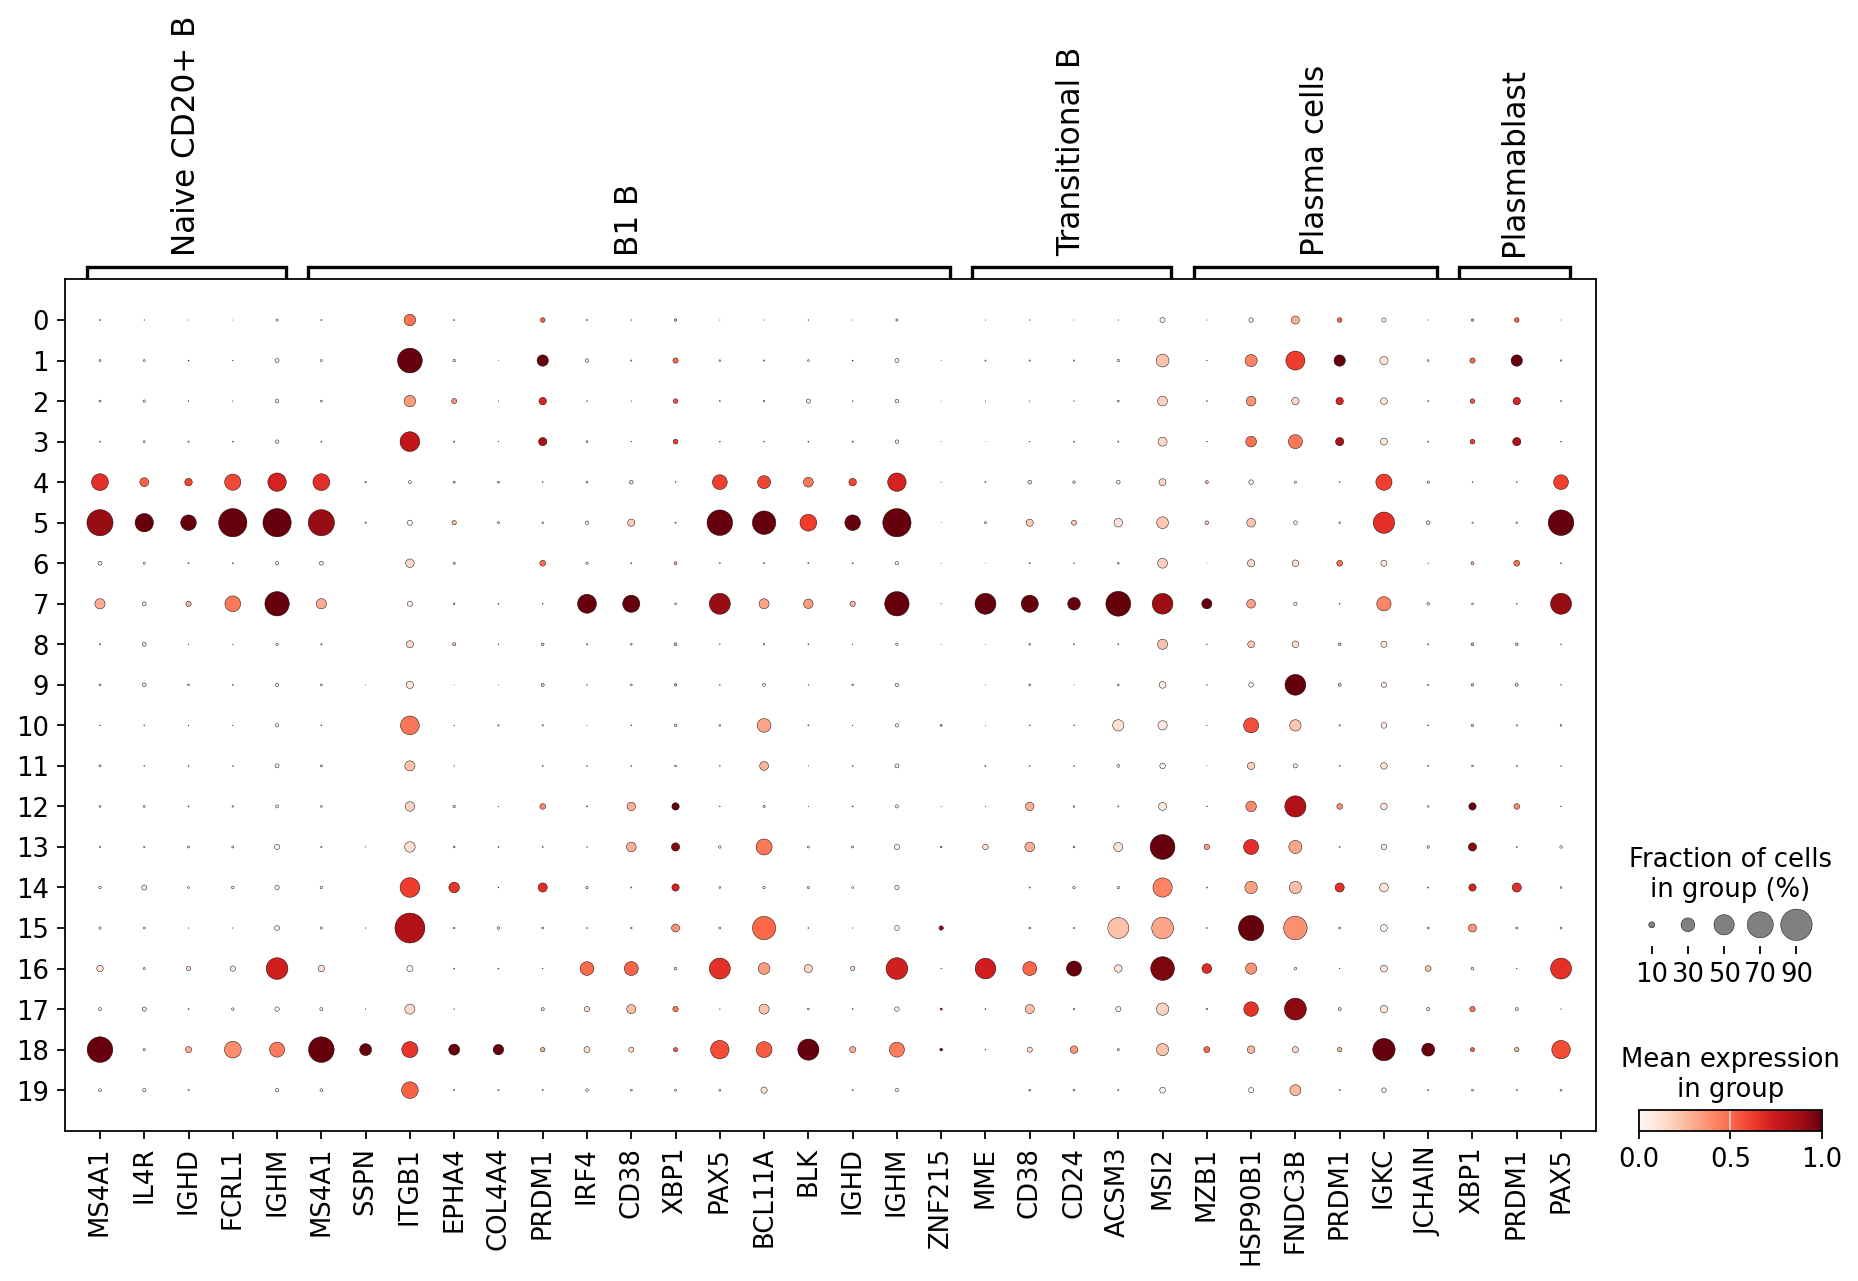

In [19]:
sc.pl.dotplot(
    adata_leiden,
    groupby="leiden_2",
    var_names=B_plasma_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [20]:
cl_annotation = {
    "4": "Naive CD20+ B",
    "5": "Naive CD20+ B",
    "7": "Transitional B",
    "18": "B1 B",  # note that IGHD and IGHM are negative markers, in this case more lowly expressed than in the other B cell clusters
}

In [21]:
adata.obs['leiden_2'] = adata_leiden.obs['leiden_2']
adata.obs["manual_celltype_annotation"] = adata.obs.leiden_2.map(cl_annotation)

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


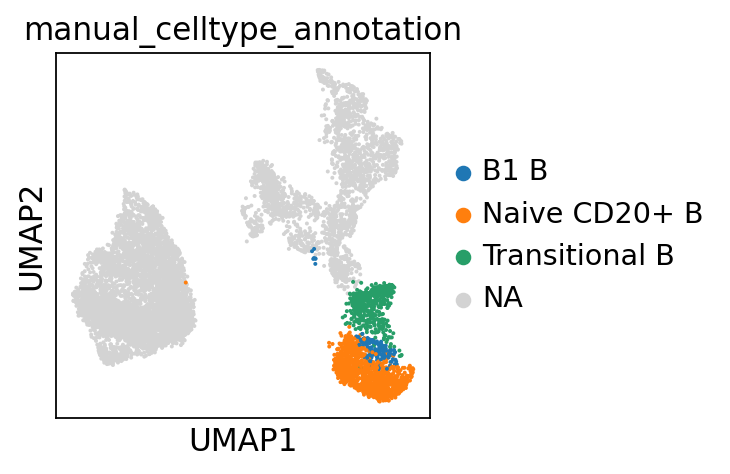

In [22]:
sc.pl.umap(adata, color=["manual_celltype_annotation"])

## From cluster differentially expressed genes to cluster annotation

In [23]:
# 该函数可以根据指定的类别（例如，细胞类型）将基因分为高表达和低表达两组，
# 并计算每个基因在这两组之间的差异表达
sc.tl.rank_genes_groups(
    adata, groupby="leiden_2", method="wilcoxon", key_added="dea_leiden_2"
)

In [24]:
# 这个函数的输出结果可以通过 sc.get.rank_genes_groups_df 获得
sc.get.rank_genes_groups_df(adata, group='1', key='dea_leiden_2')

,names,scores,logfoldchanges,pvals,pvals_adj
0,SYNE1,30.564253,2.237855,3.656413e-205,1.141093e-200
1,TGFBR3,30.508341,2.633046,2.019894e-204,3.151843e-200
2,MALAT1,29.270754,0.616618,2.444741e-188,2.543183e-184
3,SYNE2,28.885899,2.055894,1.795260e-183,1.400662e-179
4,PRKCH,27.674297,1.894720,1.423808e-168,8.886841e-165
...,...,...,...,...,...
31203,TCF4,-9.499131,-3.861194,2.116484e-21,3.130390e-19
31204,MEF2C,-9.744906,-3.899288,1.939567e-22,3.041708e-20
31205,CD74,-10.610982,-1.673952,2.649493e-26,4.892626e-24
31206,AFF3,-13.908273,-4.388625,5.642591e-44,1.914065e-41


In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_2", standard_scale="var", n_genes=5, key="dea_leiden_2"
)

In [25]:
# sc.tl.filter_rank_genes_groups()函数可以根据差异表达的阈值过滤掉一些基因，
# 以便更好地可视化差异表达的结果

sc.tl.filter_rank_genes_groups(
    adata,
    min_in_group_fraction=0.2,  # 分组内基因表达的最小比例, default: 0.25
    min_fold_change=1,  # 基因表达的最小倍数变化
    max_out_group_fraction=0.2,  # 分组外基因表达的最大比例, default: 0.5
    key="dea_leiden_2",
    key_added="dea_leiden_2_filtered",
)

/home/mowp/mambaforge/envs/sc/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


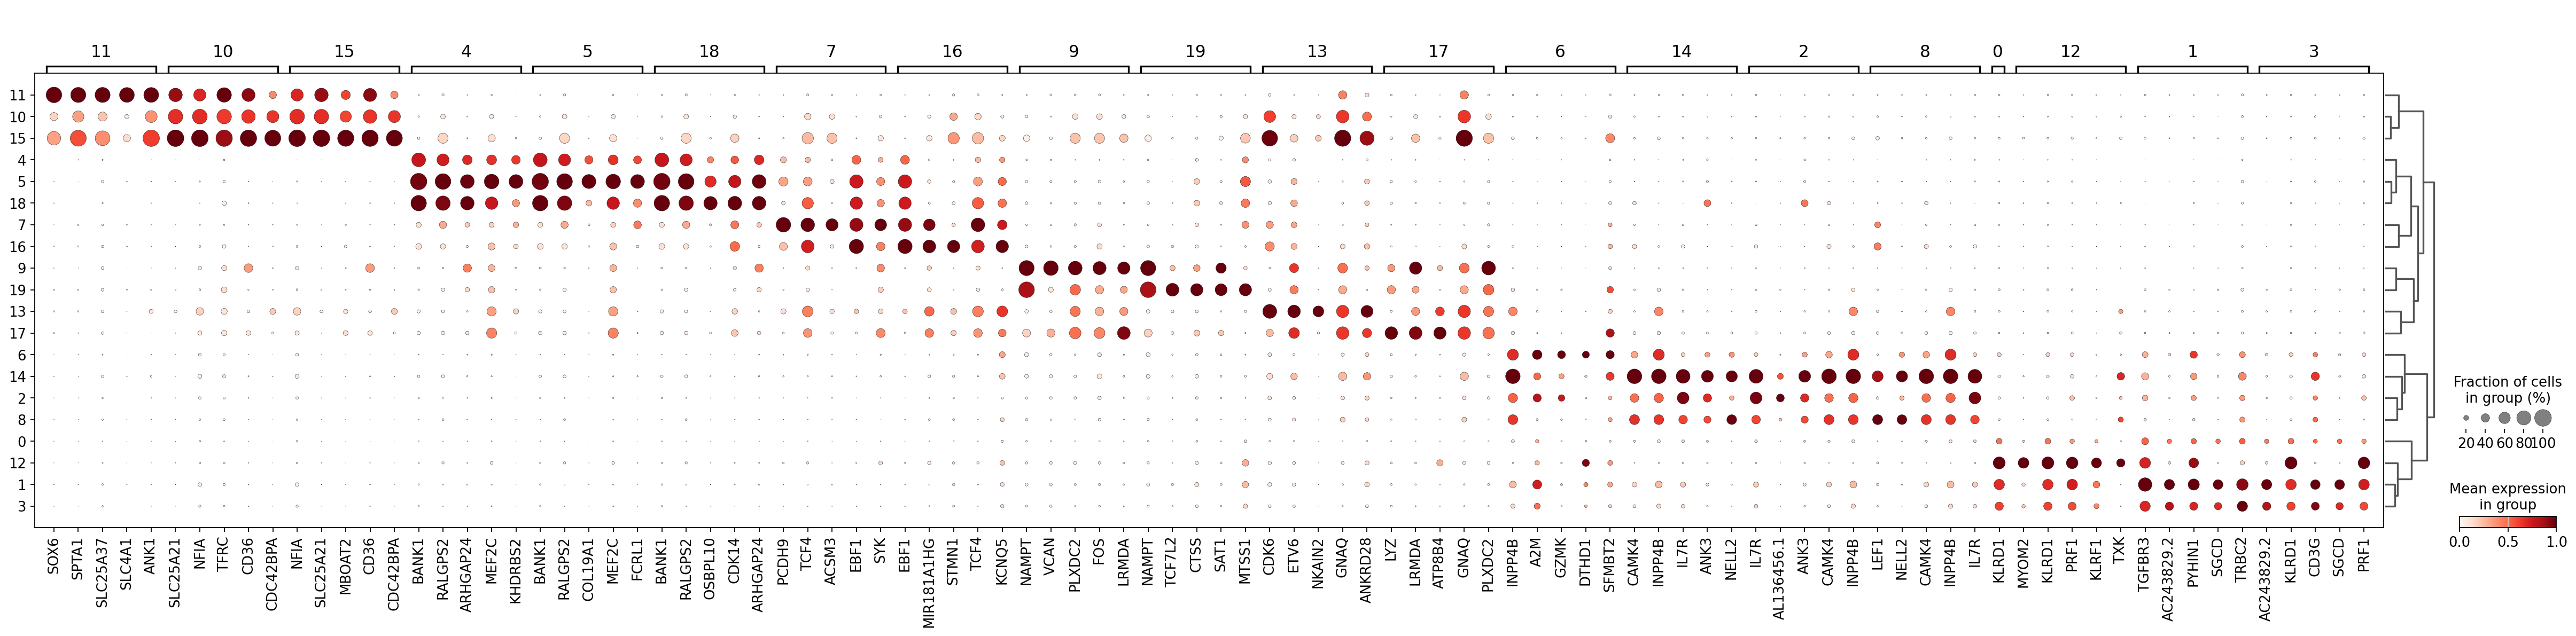

In [26]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="leiden_2",
    standard_scale="var",
    n_genes=5,
    key="dea_leiden_2_filtered",
)

GPT: here are the gene CDK6, EVT6, NKAIN2, GNAQ highly expressed in the cell, tell me the cell type of this cell

In [27]:
cl_annotation

{'4': 'Naive CD20+ B',
 '5': 'Naive CD20+ B',
 '7': 'Transitional B',
 '18': 'B1 B'}

In [28]:
cl_annotation["13"] = "HSCs + MK/E prog (?)"

In [29]:
adata.obs["manual_celltype_annotation"] = adata.obs.leiden_2.map(cl_annotation)